In [1]:
import os
import pandas as pd
from pathlib import Path

# Root directory
root_path = Path("/mnt/ben-shalom_nas/raw_data/rbs_maxtwo_desktop/harddisk24tbvol1/Media_Density_T3_07012025_AR/Media_Density_T3_07012025_AR/shruti_axontracking_analysis_detailedcsvs/")

# This will store all the data
data_dict = {}

# Walk through each subfolder
for run_folder in root_path.iterdir():
    if run_folder.is_dir():
        # Extract run number from folder name (after last "_")
        run_number = run_folder.name.split("_")[-1]
        
        # Path to csv folder
        csv_folder = run_folder / "csv"
        if csv_folder.exists():
            run_data = {}
            for file in csv_folder.glob("*.csv"):
                # Remove ".csv" from filename to use as key
                key_name = file.stem  # e.g., branch_metrics, axon_summary_metrics
                try:
                    run_data[key_name] = pd.read_csv(file)
                except Exception as e:
                    print(f"Error reading {file.name} in run {run_number}: {e}")
            data_dict[run_number] = run_data


In [3]:
import pandas as pd
import re

def search_column_across_runs(data_dict, column_name):
    results = []
    for run_num, file_dict in data_dict.items():
        # Extract numeric part of run_num
        numeric_run_num = int(re.search(r'\d+', run_num).group())
        for file_name, df in file_dict.items():
            if column_name in df.columns:
                for val in df[column_name].dropna():
                    results.append({
                        "run_number": numeric_run_num,  # Ensure numeric sorting
                        "file": file_name,
                        "value": val
                    })
    df = pd.DataFrame(results)
    df = df.sort_values(by='run_number').reset_index(drop=True)
    return df

# Run the function
results_df = search_column_across_runs(data_dict, "branchLen")

results_df

,run_number,file,value
0,44,branch_metrics,190.6
1,44,branch_metrics,261.6
2,44,branch_metrics,357.9
3,44,branch_metrics,236.9
4,44,branch_metrics,322.9
...,...,...,...
5733,182643,branch_metrics,187.9
5734,182643,branch_metrics,164.7
5735,182643,branch_metrics,123.6
5736,182643,branch_metrics,1113.9


In [5]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 6.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


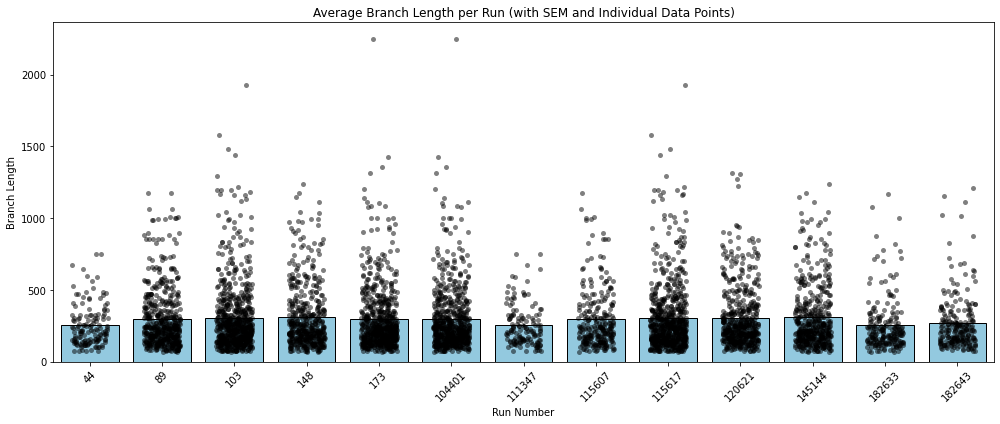

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Clean up non-numeric rows
results_df_cleaned = results_df[pd.to_numeric(results_df['value'], errors='coerce').notnull()].copy()
results_df_cleaned['value'] = results_df_cleaned['value'].astype(float)

# Step 2: Compute average and standard error per run
summary_df = results_df_cleaned.groupby('run_number').agg(
    mean_value=('value', 'mean'),
    stderr_value=('value', lambda x: x.std(ddof=1) / np.sqrt(len(x)))
).reset_index()

# Step 3: Set up the plot
plt.figure(figsize=(14, 6))

# Bar plot with error bars
sns.barplot(
    x='run_number', y='mean_value', data=summary_df,
    yerr=summary_df['stderr_value'], capsize=0.2,
    color='skyblue', edgecolor='black'
)

# Dot plot of individual points (with jitter)
sns.stripplot(
    x='run_number', y='value', data=results_df_cleaned,
    color='black', alpha=0.5, jitter=0.25
)

# Final touches
plt.xlabel('Run Number')
plt.ylabel('Branch Length')
plt.title('Average Branch Length per Run (with SEM and Individual Data Points)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Loading metadata...
Found 8 axon tracking runs
Loading detailed data...
Loaded data for 5 runs

Analyzing branchLen
Found 2256 data points for branchLen


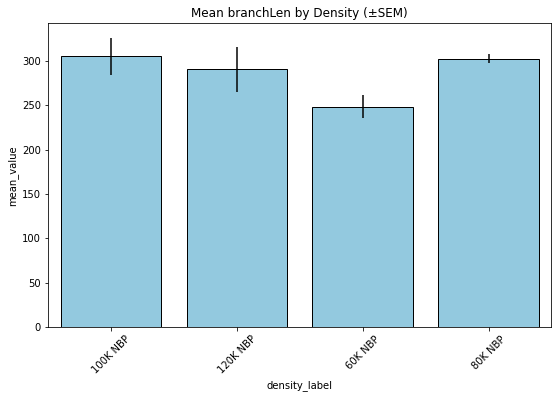


Summary Statistics for branchLen:
--------------------------------------------------
               count     mean      std   min     max
density_label                                       
100K NBP         105  305.060  217.463  77.2   999.7
120K NBP          82  290.472  226.274  70.0  1175.9
60K NBP          119  248.701  137.016  77.2   752.4
80K NBP         1945  302.377  225.511  70.0  2251.4

ANOVA Results for branchLen:
F-statistic: 2.2642
p-value: 0.0791

Analyzing neuronFiringRate
Found 2856 data points for neuronFiringRate


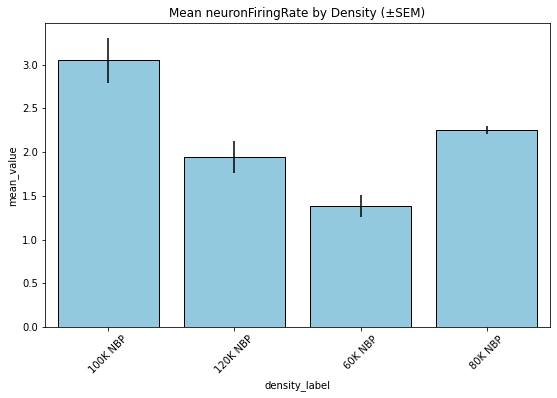


Summary Statistics for neuronFiringRate:
--------------------------------------------------
               count   mean    std   min    max
density_label                                  
100K NBP         129  3.048  2.964  0.11   8.21
120K NBP         108  1.945  1.864  0.12   4.60
60K NBP          227  1.384  1.845  0.11   9.35
80K NBP         2382  2.253  2.140  0.11  10.41

ANOVA Results for neuronFiringRate:
F-statistic: 18.5251
p-value: 0.0000
Significant difference found between groups!

Pairwise t-tests (Bonferroni corrected):
60K NBP vs 80K NBP: p = 0.0000 ***
60K NBP vs 100K NBP: p = 0.0000 ***
60K NBP vs 120K NBP: p = 0.0099 
80K NBP vs 100K NBP: p = 0.0001 ***
80K NBP vs 120K NBP: p = 0.1415 
100K NBP vs 120K NBP: p = 0.0009 ***

Analyzing branchConductionVel
Found 2256 data points for branchConductionVel


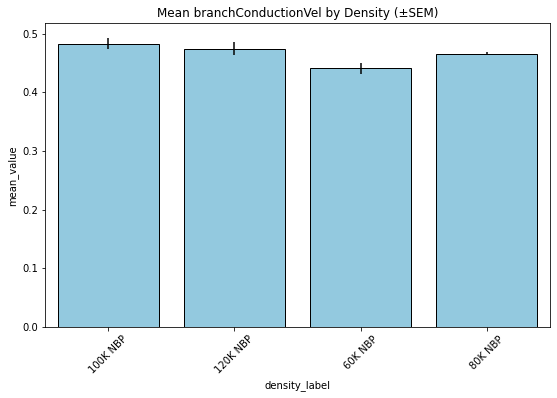


Summary Statistics for branchConductionVel:
--------------------------------------------------
               count   mean    std    min    max
density_label                                   
100K NBP         105  0.483  0.102  0.243  0.690
120K NBP          82  0.474  0.105  0.144  0.691
60K NBP          119  0.441  0.104  0.164  0.707
80K NBP         1945  0.466  0.108  0.153  0.818

ANOVA Results for branchConductionVel:
F-statistic: 3.2642
p-value: 0.0206
Significant difference found between groups!

Pairwise t-tests (Bonferroni corrected):
60K NBP vs 80K NBP: p = 0.0128 
60K NBP vs 100K NBP: p = 0.0023 ***
60K NBP vs 120K NBP: p = 0.0253 
80K NBP vs 100K NBP: p = 0.1123 
80K NBP vs 120K NBP: p = 0.4892 
100K NBP vs 120K NBP: p = 0.5687 

Analyzing totNoSpikes
Found 2856 data points for totNoSpikes


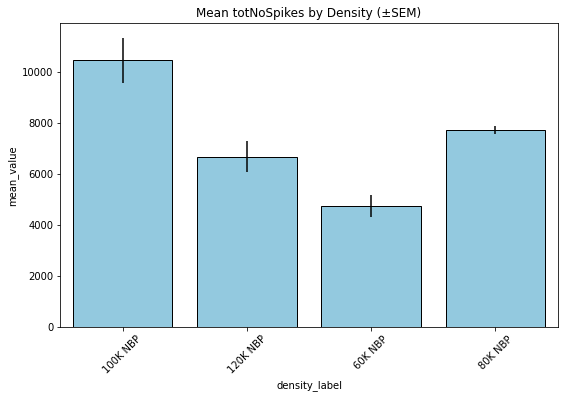


Summary Statistics for totNoSpikes:
--------------------------------------------------
               count       mean        std    min      max
density_label                                             
100K NBP         129  10468.155  10134.603  393.0  28091.0
120K NBP         108   6689.306   6417.309  402.0  15754.0
60K NBP          227   4759.943   6356.952  380.0  32218.0
80K NBP         2382   7742.009   7328.444  380.0  35600.0

ANOVA Results for totNoSpikes:
F-statistic: 18.5675
p-value: 0.0000
Significant difference found between groups!

Pairwise t-tests (Bonferroni corrected):
60K NBP vs 80K NBP: p = 0.0000 ***
60K NBP vs 100K NBP: p = 0.0000 ***
60K NBP vs 120K NBP: p = 0.0101 
80K NBP vs 100K NBP: p = 0.0001 ***
80K NBP vs 120K NBP: p = 0.1424 
100K NBP vs 120K NBP: p = 0.0009 ***


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import re

# Step 1: Load and filter the metadata
def load_and_filter_metadata(file_path):
    """Load metadata and filter for Axon Tracking assays only"""
    metadata = pd.read_csv(file_path)  # Assuming tab-separated
    
    # Filter for Axon Tracking assays only
    axon_tracking_data = metadata[metadata['Assay'] == 'Axon Tracking'].copy()
    
    # Create a mapping of run number to density/media info
    run_density_map = {}
    
    for _, row in axon_tracking_data.iterrows():
        run_num = row['Run #']
        wells = str(row['Wells_Recorded']).split(',')
        sources = str(row['Neuron Source']).split(',')
        
        # Clean up wells and sources
        wells = [w.strip() for w in wells]
        sources = [s.strip() for s in sources]
        
        # Extract density and media info for each well
        well_info = {}
        for well, source in zip(wells, sources):
            # Parse density (e.g., "120K") and media (e.g., "NBP", "DMEM")
            density_match = re.search(r'(\d+)K', source)
            media_match = re.search(r'(NBP|DMEM)', source)
            
            if density_match and media_match:
                density = int(density_match.group(1))
                media = media_match.group(1)
                well_info[int(well)] = {'density': density, 'media': media, 'full_source': source}
        
        run_density_map[run_num] = {
            'date': row['Date'],
            'div': row['DIV'],
            'id': row['ID'],
            'wells': well_info
        }
    
    return run_density_map

# Step 2: Load detailed CSV data (your existing code)
def load_detailed_data(root_path):
    """Load all detailed CSV data from run folders"""
    data_dict = {}
    
    for run_folder in Path(root_path).iterdir():
        if run_folder.is_dir():
            run_number = int(run_folder.name.split("_")[-1])
            
            csv_folder = run_folder / "csv"
            if csv_folder.exists():
                run_data = {}
                for file in csv_folder.glob("*.csv"):
                    key_name = file.stem
                    try:
                        run_data[key_name] = pd.read_csv(file)
                    except Exception as e:
                        print(f"Error reading {file.name} in run {run_number}: {e}")
                data_dict[run_number] = run_data
    
    return data_dict

# Step 3: Enhanced search function that includes density information
def search_column_with_density(data_dict, run_density_map, column_name):
    """Search for column across runs and add density information"""
    results = []
    
    for run_num, file_dict in data_dict.items():
        if run_num not in run_density_map:
            print(f"Warning: Run {run_num} not found in density mapping")
            continue
            
        for file_name, df in file_dict.items():
            if column_name in df.columns:
                for idx, val in df[column_name].dropna().items():
                    # Try to get neuron number to map to well
                    neuron_num = None
                    if 'neuron' in df.columns:
                        neuron_num = df.loc[idx, 'neuron']
                    
                    # Map neuron to density (this might need adjustment based on your data structure)
                    density_info = None
                    wells_info = run_density_map[run_num]['wells']
                    
                    # If we have neuron number, try to map it to a well
                    if neuron_num is not None and neuron_num in wells_info:
                        density_info = wells_info[neuron_num]
                    elif len(wells_info) == 1:
                        # If only one well, use that
                        density_info = list(wells_info.values())[0]
                    else:
                        # Take the first well as default (you might want to adjust this)
                        density_info = list(wells_info.values())[0]
                    
                    if density_info:
                        results.append({
                            "run_number": run_num,
                            "file": file_name,
                            "value": val,
                            "density": density_info['density'],
                            "media": density_info['media'],
                            "neuron": neuron_num,
                            "date": run_density_map[run_num]['date'],
                            "div": run_density_map[run_num]['div']
                        })
    
    df = pd.DataFrame(results)
    if not df.empty:
        df = df.sort_values(by=['run_number', 'density']).reset_index(drop=True)
    return df

# Step 4: Plotting functions
def plot_density_comparison(df, metric_name, plot_type='both'):
    """Create plots comparing densities for a given metric"""
    # Clean up non-numeric values
    df_clean = df[pd.to_numeric(df['value'], errors='coerce').notnull()].copy()
    df_clean['value'] = df_clean['value'].astype(float)
    
    if df_clean.empty:
        print(f"No valid data found for {metric_name}")
        return
    
    # Create density labels
    df_clean['density_label'] = df_clean['density'].astype(str) + 'K ' + df_clean['media']
    
    plt.figure(figsize=(15, 10))
    
    if plot_type in ['both', 'bar']:
        plt.subplot(2, 2, 3)
        summary_df = df_clean.groupby('density_label').agg(
            mean_value=('value', 'mean'),
            stderr_value=('value', lambda x: x.std(ddof=1) / np.sqrt(len(x)) if len(x) > 1 else 0)
        ).reset_index()
        
        # Drop rows with NaN or invalid values
        summary_df = summary_df.dropna(subset=['mean_value', 'stderr_value'])
        
        # Ensure yerr matches y in shape
        yerr = summary_df['stderr_value'].values
        if len(yerr) != len(summary_df['mean_value']):
            print("Warning: yerr and y values do not match in shape. Skipping error bars.")
            yerr = None
        
        sns.barplot(data=summary_df, x='density_label', y='mean_value', 
                    yerr=yerr, capsize=0.2, color='skyblue', edgecolor='black')
        plt.title(f'Mean {metric_name} by Density (±SEM)')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\nSummary Statistics for {metric_name}:")
    print("-" * 50)
    summary_stats = df_clean.groupby('density_label')['value'].agg([
        'count', 'mean', 'std', 'min', 'max'
    ]).round(3)
    print(summary_stats)

# Step 5: Statistical analysis
def statistical_analysis(df, metric_name):
    """Perform statistical analysis comparing densities"""
    from scipy import stats
    
    df_clean = df[pd.to_numeric(df['value'], errors='coerce').notnull()].copy()
    df_clean['value'] = df_clean['value'].astype(float)
    df_clean['density_label'] = df_clean['density'].astype(str) + 'K ' + df_clean['media']
    
    # Order density labels from least to greatest
    density_order = df_clean.groupby('density_label')['density'].first().sort_values().index.tolist()
    df_clean['density_label'] = pd.Categorical(df_clean['density_label'], categories=density_order, ordered=True)
    
    # Group data by density (in order)
    groups = []
    group_names = []
    for density in density_order:
        group_data = df_clean[df_clean['density_label'] == density]['value'].values
        if len(group_data) > 0:
            groups.append(group_data)
            group_names.append(density)
    
    if len(groups) > 2:
        # ANOVA for multiple groups
        f_stat, p_value = stats.f_oneway(*groups)
        print(f"\nANOVA Results for {metric_name}:")
        print(f"F-statistic: {f_stat:.4f}")
        print(f"p-value: {p_value:.4f}")
        
        if p_value < 0.05:
            print("Significant difference found between groups!")
            
            # Post-hoc pairwise comparisons
            print("\nPairwise t-tests (Bonferroni corrected):")
            n_comparisons = len(groups) * (len(groups) - 1) // 2
            alpha_corrected = 0.05 / n_comparisons
            
            for i in range(len(groups)):
                for j in range(i+1, len(groups)):
                    t_stat, p_val = stats.ttest_ind(groups[i], groups[j])
                    significant = "***" if p_val < alpha_corrected else ""
                    print(f"{group_names[i]} vs {group_names[j]}: p = {p_val:.4f} {significant}")
    
    elif len(groups) == 2:
        # t-test for two groups
        t_stat, p_value = stats.ttest_ind(groups[0], groups[1])
        print(f"\nt-test Results for {metric_name}:")
        print(f"t-statistic: {t_stat:.4f}")
        print(f"p-value: {p_value:.4f}")
        print(f"Significant: {'Yes' if p_value < 0.05 else 'No'}")

# Example usage:
# Replace these paths with your actual file paths
metadata_file_path = "/mnt/disk20tb/shruti/MaxTwo_MEA Tracking Sheets_Sep2024 onwards_AR(AutoRecovered)(Media Density Exp_T3_070120).csv"  # The tab-separated file you pasted
detailed_data_path = root_path

# Load data
print("Loading metadata...")
run_density_map = load_and_filter_metadata(metadata_file_path)
print(f"Found {len(run_density_map)} axon tracking runs")

print("Loading detailed data...")
data_dict = load_detailed_data(detailed_data_path)
print(f"Loaded data for {len(data_dict)} runs")

# Analyze different metrics
metrics_to_analyze = ['branchLen', 'neuronFiringRate', 'branchConductionVel', 'totNoSpikes']

for metric in metrics_to_analyze:
    print(f"\n{'='*60}")
    print(f"Analyzing {metric}")
    print('='*60)
    
    # Get data with density information
    results_df = search_column_with_density(data_dict, run_density_map, metric)
    
    if not results_df.empty:
        print(f"Found {len(results_df)} data points for {metric}")
        
        # Create plots
        plot_density_comparison(results_df, metric)
        
        # Statistical analysis
        statistical_analysis(results_df, metric)
    else:
        print(f"No data found for {metric}")

# Function to explore available metrics
def explore_available_metrics(data_dict):
    """Find all available column names across all files"""
    all_columns = set()
    for run_num, file_dict in data_dict.items():
        for file_name, df in file_dict.items():
            all_columns.update(df.columns)
    
    print("Available metrics to analyze:")
    for col in sorted(all_columns):
        print(f"  - {col}")
    
    return sorted(all_columns)

# Uncomment to see all available metrics:
# available_metrics = explore_available_metrics(data_dict)

Loading metadata...
Found 8 axon tracking runs
Axon tracking runs found:
  Run 44: 6 wells
    Well 1: 60K NBP
    Well 2: 80K NBP
    Well 3: 100K NBP
    Well 4: 120K NBP
    Well 5: 100K NBP
    Well 6: 120K NBP
  Run 89: 3 wells
    Well 2: 80K NBP
    Well 4: 120K NBP
    Well 5: 100K NBP
  Run 103: 3 wells
    Well 2: 80K NBP
    Well 4: 120K NBP
    Well 5: 100K NBP
  Run 148: 3 wells
    Well 2: 80K NBP
    Well 4: 120K NBP
    Well 5: 100K NBP
  Run 173: 3 wells
    Well 2: 80K NBP
    Well 4: 120K NBP
    Well 5: 100K NBP
  Run 174: 3 wells
    Well 2: 80K NBP
    Well 4: 120K NBP
    Well 5: 100K NBP
  Run 192: 3 wells
    Well 2: 80K NBP
    Well 4: 120K NBP
    Well 5: 100K NBP
  Run 225: 3 wells
    Well 2: 80K NBP
    Well 4: 120K NBP
    Well 5: 100K NBP

Loading detailed data...
Loaded data for 5 runs
Runs with detailed data: [44, 89, 103, 148, 173]

Runs with both metadata and detailed data: [44, 89, 103, 148, 173]

Available metrics to analyze:
  - Plating Date
  - U

/tmp/ipykernel_1649850/1930233904.py:155: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_df = df_clean.groupby('density_label').agg(


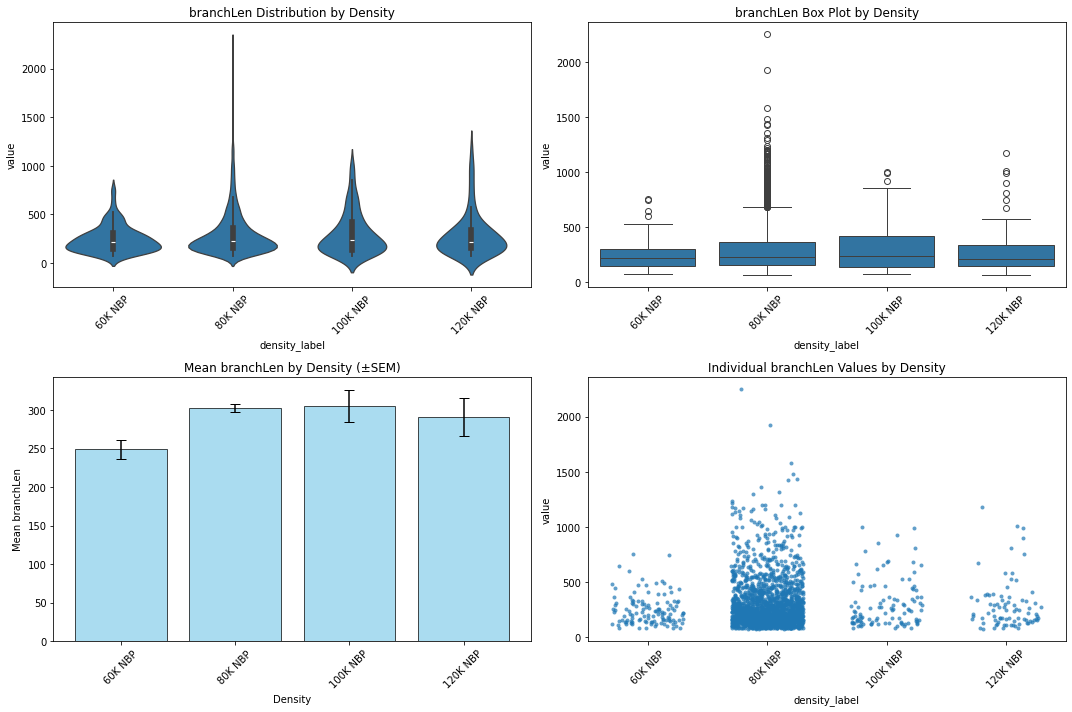


Summary Statistics for branchLen:
--------------------------------------------------
               count     mean      std   min     max
density_label                                       
60K NBP          119  248.701  137.016  77.2   752.4
80K NBP         1945  302.377  225.511  70.0  2251.4
100K NBP         105  305.060  217.463  77.2   999.7
120K NBP          82  290.472  226.274  70.0  1175.9

ANOVA Results for branchLen:
F-statistic: 2.2642
p-value: 0.0791
No significant differences found between groups.

Analyzing neuronFiringRate
Found 2856 data points for neuronFiringRate
Density combinations found:
  60K NBP: 229 data points
  80K NBP: 2390 data points
  100K NBP: 129 data points
  120K NBP: 108 data points


/tmp/ipykernel_1649850/1930233904.py:187: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_clean.groupby('density_label')['value'].agg([
/tmp/ipykernel_1649850/1930233904.py:155: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_df = df_clean.groupby('density_label').agg(


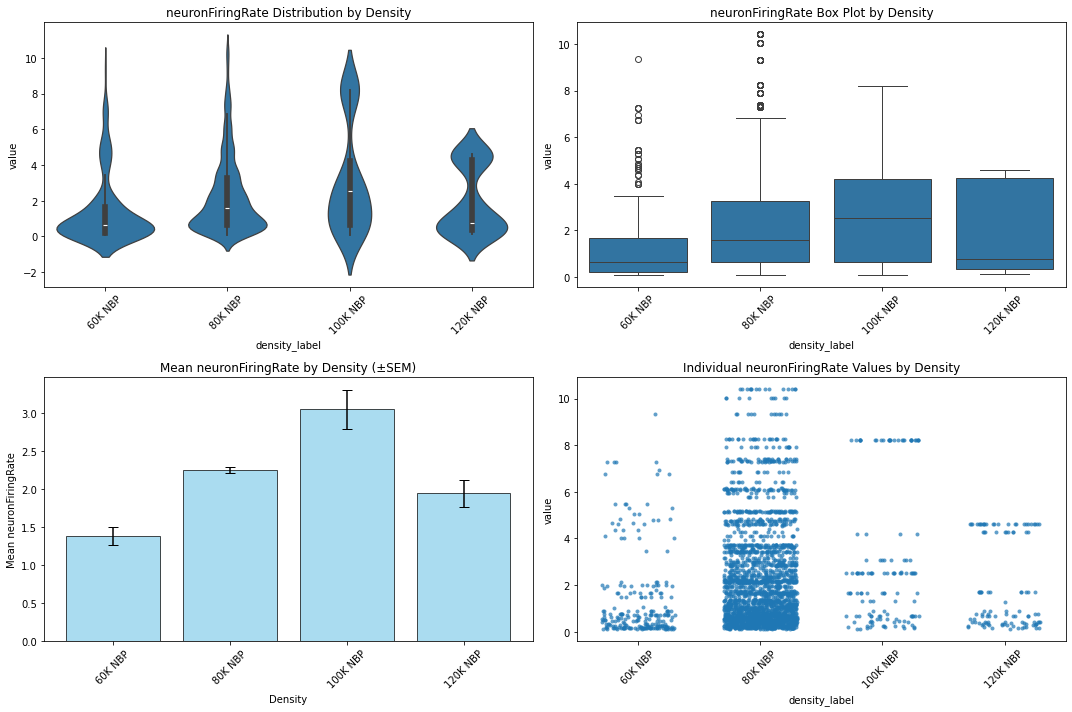


Summary Statistics for neuronFiringRate:
--------------------------------------------------
               count   mean    std   min    max
density_label                                  
60K NBP          227  1.384  1.845  0.11   9.35
80K NBP         2382  2.253  2.140  0.11  10.41
100K NBP         129  3.048  2.964  0.11   8.21
120K NBP         108  1.945  1.864  0.12   4.60

ANOVA Results for neuronFiringRate:
F-statistic: 18.5251
p-value: 0.0000
Significant difference found between groups!

Pairwise t-tests (Bonferroni corrected):
60K NBP vs 80K NBP: p = 0.0000 ***
60K NBP vs 100K NBP: p = 0.0000 ***
60K NBP vs 120K NBP: p = 0.0099 
80K NBP vs 100K NBP: p = 0.0001 ***
80K NBP vs 120K NBP: p = 0.1415 
100K NBP vs 120K NBP: p = 0.0009 ***

Analyzing branchConductionVel
Found 2256 data points for branchConductionVel
Density combinations found:
  60K NBP: 120 data points
  80K NBP: 1949 data points
  100K NBP: 105 data points
  120K NBP: 82 data points


/tmp/ipykernel_1649850/1930233904.py:187: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_clean.groupby('density_label')['value'].agg([
/tmp/ipykernel_1649850/1930233904.py:155: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_df = df_clean.groupby('density_label').agg(


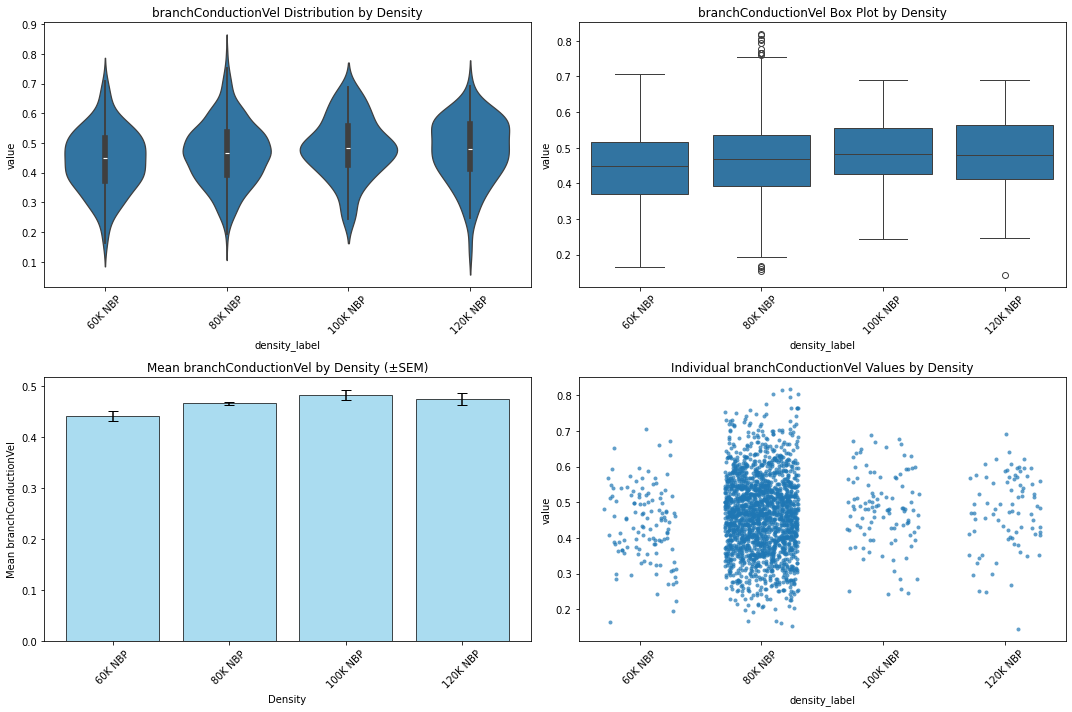


Summary Statistics for branchConductionVel:
--------------------------------------------------
               count   mean    std    min    max
density_label                                   
60K NBP          119  0.441  0.104  0.164  0.707
80K NBP         1945  0.466  0.108  0.153  0.818
100K NBP         105  0.483  0.102  0.243  0.690
120K NBP          82  0.474  0.105  0.144  0.691

ANOVA Results for branchConductionVel:
F-statistic: 3.2642
p-value: 0.0206
Significant difference found between groups!

Pairwise t-tests (Bonferroni corrected):
60K NBP vs 80K NBP: p = 0.0128 
60K NBP vs 100K NBP: p = 0.0023 ***
60K NBP vs 120K NBP: p = 0.0253 
80K NBP vs 100K NBP: p = 0.1123 
80K NBP vs 120K NBP: p = 0.4892 
100K NBP vs 120K NBP: p = 0.5687 

Analyzing totNoSpikes
Found 2856 data points for totNoSpikes
Density combinations found:
  60K NBP: 229 data points
  80K NBP: 2390 data points
  100K NBP: 129 data points
  120K NBP: 108 data points


/tmp/ipykernel_1649850/1930233904.py:187: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_clean.groupby('density_label')['value'].agg([
/tmp/ipykernel_1649850/1930233904.py:155: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_df = df_clean.groupby('density_label').agg(


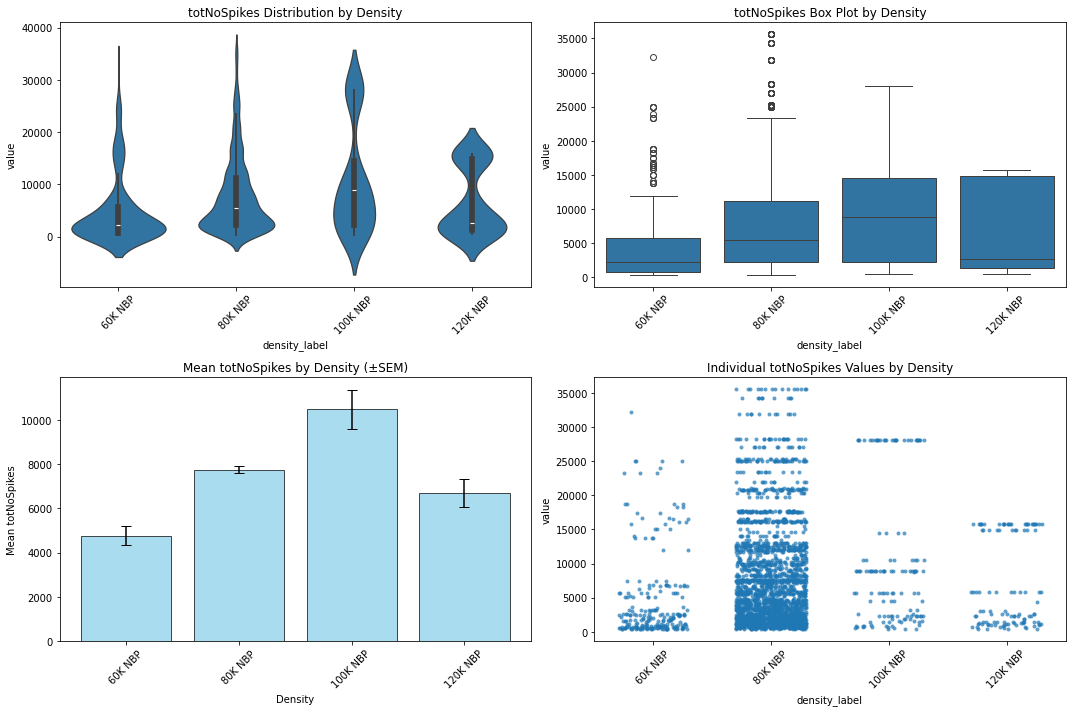


Summary Statistics for totNoSpikes:
--------------------------------------------------
               count       mean        std    min      max
density_label                                             
60K NBP          227   4759.943   6356.952  380.0  32218.0
80K NBP         2382   7742.009   7328.444  380.0  35600.0
100K NBP         129  10468.155  10134.603  393.0  28091.0
120K NBP         108   6689.306   6417.309  402.0  15754.0

ANOVA Results for totNoSpikes:
F-statistic: 18.5675
p-value: 0.0000
Significant difference found between groups!

Pairwise t-tests (Bonferroni corrected):
60K NBP vs 80K NBP: p = 0.0000 ***
60K NBP vs 100K NBP: p = 0.0000 ***
60K NBP vs 120K NBP: p = 0.0101 
80K NBP vs 100K NBP: p = 0.0001 ***
80K NBP vs 120K NBP: p = 0.1424 
100K NBP vs 120K NBP: p = 0.0009 ***


/tmp/ipykernel_1649850/1930233904.py:187: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_clean.groupby('density_label')['value'].agg([


In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import re

# Step 1: Load and filter the metadata
def load_and_filter_metadata(file_path):
    """Load metadata and filter for Axon Tracking assays only"""
    metadata = pd.read_csv(file_path)  # Regular CSV format
    
    # Filter for Axon Tracking assays only
    axon_tracking_data = metadata[metadata['Assay'] == 'Axon Tracking'].copy()
    
    # Create a mapping of run number to density/media info
    run_density_map = {}
    
    for _, row in axon_tracking_data.iterrows():
        run_num = row['Run #']
        wells = str(row['Wells_Recorded']).split(',')
        sources = str(row['Neuron Source']).split(',')
        
        # Clean up wells and sources
        wells = [w.strip() for w in wells]
        sources = [s.strip() for s in sources]
        
        # Extract density and media info for each well
        well_info = {}
        for well, source in zip(wells, sources):
            # Parse density (e.g., "120K") and media (e.g., "NBP", "DMEM")
            density_match = re.search(r'(\d+)K', source)
            media_match = re.search(r'(NBP|DMEM)', source)
            
            if density_match and media_match:
                density = int(density_match.group(1))
                media = media_match.group(1)
                well_info[int(well)] = {'density': density, 'media': media, 'full_source': source}
        
        run_density_map[run_num] = {
            'date': row['Date'],
            'div': row['DIV'],
            'id': row['ID'],
            'wells': well_info
        }
    
    return run_density_map

# Step 2: Load detailed CSV data (your existing code)
def load_detailed_data(root_path):
    """Load all detailed CSV data from run folders"""
    data_dict = {}
    
    for run_folder in Path(root_path).iterdir():
        if run_folder.is_dir():
            run_number = int(run_folder.name.split("_")[-1])
            
            csv_folder = run_folder / "csv"
            if csv_folder.exists():
                run_data = {}
                for file in csv_folder.glob("*.csv"):
                    key_name = file.stem
                    try:
                        run_data[key_name] = pd.read_csv(file)
                    except Exception as e:
                        print(f"Error reading {file.name} in run {run_number}: {e}")
                data_dict[run_number] = run_data
    
    return data_dict

# Step 3: Enhanced search function that includes density information
def search_column_with_density(data_dict, run_density_map, column_name):
    """Search for column across runs and add density information"""
    results = []
    
    for run_num, file_dict in data_dict.items():
        if run_num not in run_density_map:
            print(f"Warning: Run {run_num} not found in density mapping")
            continue
            
        for file_name, df in file_dict.items():
            if column_name in df.columns:
                for idx, val in df[column_name].dropna().items():
                    # Try to get neuron number to map to well
                    neuron_num = None
                    if 'neuron' in df.columns:
                        neuron_num = df.loc[idx, 'neuron']
                    
                    # Map neuron to density (this might need adjustment based on your data structure)
                    density_info = None
                    wells_info = run_density_map[run_num]['wells']
                    
                    # If we have neuron number, try to map it to a well
                    if neuron_num is not None and neuron_num in wells_info:
                        density_info = wells_info[neuron_num]
                    elif len(wells_info) == 1:
                        # If only one well, use that
                        density_info = list(wells_info.values())[0]
                    else:
                        # Take the first well as default (you might want to adjust this)
                        density_info = list(wells_info.values())[0]
                    
                    if density_info:
                        results.append({
                            "run_number": run_num,
                            "file": file_name,
                            "value": val,
                            "density": density_info['density'],
                            "media": density_info['media'],
                            "neuron": neuron_num,
                            "date": run_density_map[run_num]['date'],
                            "div": run_density_map[run_num]['div']
                        })
    
    df = pd.DataFrame(results)
    if not df.empty:
        df = df.sort_values(by=['run_number', 'density']).reset_index(drop=True)
    return df

# Step 4: Plotting functions
def plot_density_comparison(df, metric_name, plot_type='both'):
    """Create plots comparing densities for a given metric"""
    # Clean up non-numeric values
    df_clean = df[pd.to_numeric(df['value'], errors='coerce').notnull()].copy()
    df_clean['value'] = df_clean['value'].astype(float)
    
    if df_clean.empty:
        print(f"No valid data found for {metric_name}")
        return
    
    # Create density labels and order them from least to greatest
    df_clean['density_label'] = df_clean['density'].astype(str) + 'K ' + df_clean['media']
    
    # Create ordered categories based on density (numerical) then media (alphabetical)
    density_order = df_clean.groupby('density_label')['density'].first().sort_values().index.tolist()
    df_clean['density_label'] = pd.Categorical(df_clean['density_label'], categories=density_order, ordered=True)
    
    plt.figure(figsize=(15, 10))
    
    if plot_type in ['both', 'violin']:
        plt.subplot(2, 2, 1)
        sns.violinplot(data=df_clean, x='density_label', y='value', order=density_order)
        plt.title(f'{metric_name} Distribution by Density')
        plt.xticks(rotation=45)
    
    if plot_type in ['both', 'box']:
        plt.subplot(2, 2, 2)
        sns.boxplot(data=df_clean, x='density_label', y='value', order=density_order)
        plt.title(f'{metric_name} Box Plot by Density')
        plt.xticks(rotation=45)
    
    if plot_type in ['both', 'bar']:
        plt.subplot(2, 2, 3)
        summary_df = df_clean.groupby('density_label').agg(
            mean_value=('value', 'mean'),
            stderr_value=('value', lambda x: x.std(ddof=1) / np.sqrt(len(x)) if len(x) > 1 else 0)
        ).reset_index()
        
        # Reorder summary_df according to density_order
        summary_df['density_label'] = pd.Categorical(summary_df['density_label'], categories=density_order, ordered=True)
        summary_df = summary_df.sort_values('density_label').reset_index(drop=True)
        
        # Create bar plot
        bars = plt.bar(range(len(summary_df)), summary_df['mean_value'], 
                      yerr=summary_df['stderr_value'], capsize=5,
                      color='skyblue', edgecolor='black', alpha=0.7)
        
        plt.xlabel('Density')
        plt.ylabel(f'Mean {metric_name}')
        plt.title(f'Mean {metric_name} by Density (±SEM)')
        plt.xticks(range(len(summary_df)), summary_df['density_label'], rotation=45)
    
    if plot_type in ['both', 'strip']:
        plt.subplot(2, 2, 4)
        sns.stripplot(data=df_clean, x='density_label', y='value', 
                     alpha=0.7, jitter=0.3, size=4, order=density_order)
        plt.title(f'Individual {metric_name} Values by Density')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics (ordered)
    print(f"\nSummary Statistics for {metric_name}:")
    print("-" * 50)
    summary_stats = df_clean.groupby('density_label')['value'].agg([
        'count', 'mean', 'std', 'min', 'max'
    ]).round(3)
    # Reorder by density
    summary_stats = summary_stats.reindex(density_order)
    print(summary_stats)

# Step 5: Statistical analysis
def statistical_analysis(df, metric_name):
    """Perform statistical analysis comparing densities"""
    try:
        from scipy import stats
    except ImportError:
        print("scipy not available. Skipping statistical analysis.")
        return
    
    df_clean = df[pd.to_numeric(df['value'], errors='coerce').notnull()].copy()
    df_clean['value'] = df_clean['value'].astype(float)
    df_clean['density_label'] = df_clean['density'].astype(str) + 'K ' + df_clean['media']
    
    # Order density labels from least to greatest
    density_order = df_clean.groupby('density_label')['density'].first().sort_values().index.tolist()
    df_clean['density_label'] = pd.Categorical(df_clean['density_label'], categories=density_order, ordered=True)
    
    # Group data by density (in order)
    groups = []
    group_names = []
    for density in density_order:
        group_data = df_clean[df_clean['density_label'] == density]['value'].values
        if len(group_data) > 0:
            groups.append(group_data)
            group_names.append(density)
    
    if len(groups) > 2:
        # ANOVA for multiple groups
        f_stat, p_value = stats.f_oneway(*groups)
        print(f"\nANOVA Results for {metric_name}:")
        print(f"F-statistic: {f_stat:.4f}")
        print(f"p-value: {p_value:.4f}")
        
        if p_value < 0.05:
            print("Significant difference found between groups!")
            
            # Post-hoc pairwise comparisons
            print("\nPairwise t-tests (Bonferroni corrected):")
            n_comparisons = len(groups) * (len(groups) - 1) // 2
            alpha_corrected = 0.05 / n_comparisons
            
            for i in range(len(groups)):
                for j in range(i+1, len(groups)):
                    t_stat, p_val = stats.ttest_ind(groups[i], groups[j])
                    significant = "***" if p_val < alpha_corrected else ""
                    print(f"{group_names[i]} vs {group_names[j]}: p = {p_val:.4f} {significant}")
        else:
            print("No significant differences found between groups.")
    
    elif len(groups) == 2:
        # t-test for two groups
        t_stat, p_value = stats.ttest_ind(groups[0], groups[1])
        print(f"\nt-test Results for {metric_name}:")
        print(f"t-statistic: {t_stat:.4f}")
        print(f"p-value: {p_value:.4f}")
        print(f"Significant: {'Yes' if p_value < 0.05 else 'No'}")
    else:
        print(f"Not enough groups for statistical comparison (found {len(groups)} groups)")

# Function to explore available metrics
def explore_available_metrics(data_dict):
    """Find all available column names across all files"""
    all_columns = set()
    for run_num, file_dict in data_dict.items():
        for file_name, df in file_dict.items():
            all_columns.update(df.columns)
    
    print("Available metrics to analyze:")
    for col in sorted(all_columns):
        print(f"  - {col}")
    
    return sorted(all_columns)

# Main execution
if __name__ == "__main__":
    # Replace these paths with your actual file path
    metadata_file_path = "/mnt/disk20tb/shruti/MaxTwo_MEA Tracking Sheets_Sep2024 onwards_AR(AutoRecovered)(Media Density Exp_T3_070120).csv"  # The tab-separated file you pasted
    detailed_data_path = root_path

    # Load data
    print("Loading metadata...")
    try:
        run_density_map = load_and_filter_metadata(metadata_file_path)
        print(f"Found {len(run_density_map)} axon tracking runs")
        
        # Print the runs found for debugging
        print("Axon tracking runs found:")
        for run_num, info in run_density_map.items():
            print(f"  Run {run_num}: {len(info['wells'])} wells")
            for well, well_info in info['wells'].items():
                print(f"    Well {well}: {well_info['density']}K {well_info['media']}")
    
    except Exception as e:
        print(f"Error loading metadata: {e}")
        run_density_map = {}

    print("\nLoading detailed data...")
    try:
        data_dict = load_detailed_data(detailed_data_path)
        print(f"Loaded data for {len(data_dict)} runs")
        
        # Print which runs have data
        print("Runs with detailed data:", sorted(data_dict.keys()))
        
    except Exception as e:
        print(f"Error loading detailed data: {e}")
        data_dict = {}

    # Check for overlap between metadata and detailed data
    if run_density_map and data_dict:
        metadata_runs = set(run_density_map.keys())
        detailed_runs = set(data_dict.keys())
        overlap = metadata_runs.intersection(detailed_runs)
        print(f"\nRuns with both metadata and detailed data: {sorted(overlap)}")
        
        if not overlap:
            print("WARNING: No overlap between metadata runs and detailed data runs!")
            print(f"Metadata runs: {sorted(metadata_runs)}")
            print(f"Detailed data runs: {sorted(detailed_runs)}")

    # Uncomment to see all available metrics:
    if data_dict:
        print("\n" + "="*60)
        available_metrics = explore_available_metrics(data_dict)
        print("="*60)

    # Analyze different metrics
    metrics_to_analyze = ['branchLen', 'neuronFiringRate', 'branchConductionVel', 'totNoSpikes']

    for metric in metrics_to_analyze:
        print(f"\n{'='*60}")
        print(f"Analyzing {metric}")
        print('='*60)
        
        # Get data with density information
        results_df = search_column_with_density(data_dict, run_density_map, metric)
        
        if not results_df.empty:
            print(f"Found {len(results_df)} data points for {metric}")
            
            # Print unique density combinations found
            unique_densities = results_df.groupby(['density', 'media']).size().reset_index(name='count')
            print("Density combinations found:")
            for _, row in unique_densities.iterrows():
                print(f"  {row['density']}K {row['media']}: {row['count']} data points")
            
            # Create plots
            plot_density_comparison(results_df, metric)
            
            # Statistical analysis
            statistical_analysis(results_df, metric)
        else:
            print(f"No data found for {metric}")
            
            # Debug: check if column exists anywhere
            found_in_files = []
            for run_num, file_dict in data_dict.items():
                for file_name, df in file_dict.items():
                    if metric in df.columns:
                        found_in_files.append(f"Run {run_num}, file {file_name}")
            
            if found_in_files:
                print(f"  But {metric} was found in: {found_in_files}")
            else:
                print(f"  {metric} not found in any files.")

In [14]:
pip install pillow numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load your PNG file
image_path = "/mnt/ben-shalom_nas/raw_data/rbs_maxtwo_desktop/harddisk24tbvol1/Media_Density_T3_07012025_AR/Media_Density_T3_07012025_AR/250717/M07137/AxonTracking/000148/analysis/FootprintExtraction_v1/0001/Well4/FootprintNeuron#16.png"  # Replace with the actual path
img = Image.open(image_path).convert("RGB")

# Convert image to numpy array
img_np = np.array(img)

# Convert to grayscale using luminance formula
gray_img = np.dot(img_np[...,:3], [0.2989, 0.5870, 0.1140])

# Apply a grayscale threshold to isolate the signal (tweak this threshold as needed)
threshold = 30  # Adjust if needed
axon_mask = gray_img > threshold

# Estimate pixel size from scale bar: 100 µm ≈ 18 pixels → 1 pixel ≈ 5.56 µm
pixel_size_um = 100 / 18
pixel_area_um2 = pixel_size_um ** 2

# Calculate axonal area
axon_area_um2 = np.sum(axon_mask) * pixel_area_um2

# Output results
print(f"Axon-covered area: {axon_area_um2:.2f} µm²")


Axon-covered area: 748858.02 µm²


In [20]:
import os
import re
from PIL import Image
import numpy as np
import csv

# CONFIGURATION
BASE_DIR = "/mnt/ben-shalom_nas/raw_data/rbs_maxtwo_desktop/harddisk24tbvol1/Media_Density_T3_07012025_AR/Media_Density_T3_07012025_AR"
OUTPUT_CSV = "axon_area_results.csv"
PIXELS_PER_100_UM = 18  # from scale bar
PIXEL_AREA_UM2 = (100 / PIXELS_PER_100_UM) ** 2  # µm² per pixel
THRESHOLD = 30  # grayscale or red channel threshold (adjust as needed)

def is_target_image(filename):
    return re.match(r"FootprintNeuron#\d+\.png", filename)

def extract_metadata(filepath):
    """
    Extract Plate ID, AxonTracking ID, Well number, Neuron number from the path
    """
    parts = filepath.split(os.sep)
    try:
        plate_id = next(p for p in parts if p.startswith("M"))
        tracking_id = parts[parts.index("AxonTracking") + 1]
        well_match = re.search(r"Well(\d+)", filepath)
        neuron_match = re.search(r"FootprintNeuron#(\d+)", filepath)
        return {
            "plate_id": plate_id,
            "tracking_id": tracking_id,
            "well": f"Well{well_match.group(1)}" if well_match else "Unknown",
            "neuron": f"Neuron#{neuron_match.group(1)}" if neuron_match else "Unknown"
        }
    except Exception:
        return {"plate_id": "Unknown", "tracking_id": "Unknown", "well": "Unknown", "neuron": "Unknown"}

def analyze_image(image_path, threshold=THRESHOLD):
    img = Image.open(image_path).convert("RGB")
    img_np = np.array(img)

    # Use red channel as signal indicator (red = high µV in colormap)
    red_channel = img_np[:, :, 0]

    # Apply threshold
    signal_mask = red_channel > threshold
    pixel_count = np.sum(signal_mask)
    area_um2 = pixel_count * PIXEL_AREA_UM2

    return area_um2, pixel_count

def main():
    results = []

    for root, _, files in os.walk(BASE_DIR):
        for file in files:
            if is_target_image(file):
                full_path = os.path.join(root, file)
                metadata = extract_metadata(full_path)
                area_um2, pixel_count = analyze_image(full_path)

                results.append({
                    "Plate ID": metadata["plate_id"],
                    "Tracking ID": metadata["tracking_id"],
                    "Well": metadata["well"],
                    "Neuron": metadata["neuron"],
                    "File Path": full_path,
                    "Pixel Count": pixel_count,
                    "Axon Area (µm²)": round(area_um2, 2),
                    "Threshold Used": THRESHOLD
                })

    # Output nicely
    print("\n📊 Axon Area Analysis Results:\n")
    for r in results:
        print(f"{r['Plate ID']} | {r['Tracking ID']} | {r['Well']} | {r['Neuron']}: {r['Axon Area (µm²)']} µm² (Pixels: {r['Pixel Count']})")

    # Save to CSV
    with open(OUTPUT_CSV, 'w', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=results[0].keys())
        writer.writeheader()
        writer.writerows(results)
    print(f"\n✅ Results saved to {OUTPUT_CSV}")

if __name__ == "__main__":
    main()



📊 Axon Area Analysis Results:

Media_Density_T3_07012025_AR | 000044 | Well1 | Neuron#1: 687006.17 µm² (Pixels: 22259)
Media_Density_T3_07012025_AR | 000044 | Well1 | Neuron#2: 692037.04 µm² (Pixels: 22422)
Media_Density_T3_07012025_AR | 000044 | Well1 | Neuron#3: 664814.81 µm² (Pixels: 21540)
Media_Density_T3_07012025_AR | 000044 | Well1 | Neuron#4: 659753.09 µm² (Pixels: 21376)
Media_Density_T3_07012025_AR | 000044 | Well1 | Neuron#5: 685123.46 µm² (Pixels: 22198)
Media_Density_T3_07012025_AR | 000044 | Well1 | Neuron#6: 680370.37 µm² (Pixels: 22044)
Media_Density_T3_07012025_AR | 000044 | Well1 | Neuron#7: 642469.14 µm² (Pixels: 20816)
Media_Density_T3_07012025_AR | 000044 | Well1 | Neuron#8: 661697.53 µm² (Pixels: 21439)
Media_Density_T3_07012025_AR | 000044 | Well1 | Neuron#9: 683950.62 µm² (Pixels: 22160)
Media_Density_T3_07012025_AR | 000044 | Well1 | Neuron#10: 670092.59 µm² (Pixels: 21711)
Media_Density_T3_07012025_AR | 000044 | Well1 | Neuron#11: 667932.1 µm² (Pixels: 21641)

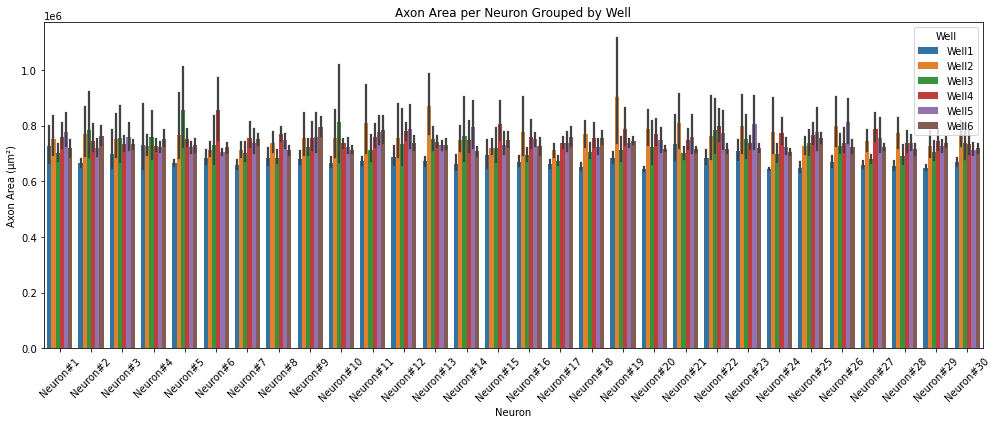

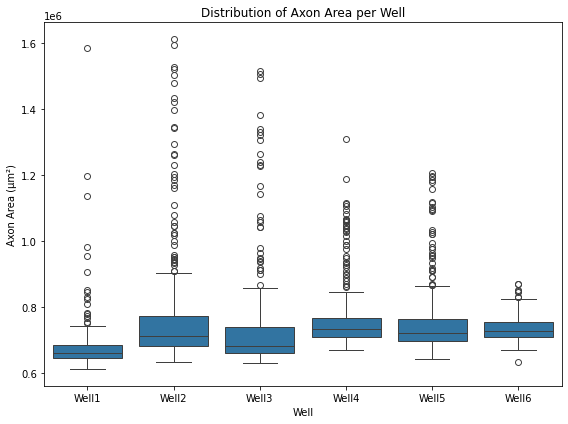

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV
df = pd.read_csv("axon_area_results.csv")  # Update path if needed

# Optional: sort for better visuals
df["Neuron ID"] = df["Neuron"].str.extract(r'#(\d+)').astype(int)
df = df.sort_values(["Well", "Neuron ID"])

# Plot 1: Bar Plot per Neuron (grouped by Well)
plt.figure(figsize=(14, 6))
sns.barplot(x="Neuron", y="Axon Area (µm²)", hue="Well", data=df)
plt.title("Axon Area per Neuron Grouped by Well")
plt.ylabel("Axon Area (µm²)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Box Plot per Well
plt.figure(figsize=(8, 6))
sns.boxplot(x="Well", y="Axon Area (µm²)", data=df)
plt.title("Distribution of Axon Area per Well")
plt.ylabel("Axon Area (µm²)")
plt.tight_layout()
plt.show()


In [25]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the PNG
image_path = "/mnt/ben-shalom_nas/raw_data/rbs_maxtwo_desktop/harddisk24tbvol1/Media_Density_T3_07012025_AR/Media_Density_T3_07012025_AR/250717/M07137/AxonTracking/000148/analysis/FootprintExtraction_v1/0001/Well2/FootprintNeuron#17.png"  # Replace with the actual path  # Change to your path
img = Image.open(image_path).convert("RGB")
img_np = np.array(img)

# Convert to grayscale
gray_img = np.dot(img_np[..., :3], [0.2989, 0.5870, 0.1140])

# Threshold to detect signal (axon area)
threshold = 30
axon_mask = gray_img > threshold

# Estimate pixel size and area
pixels_per_100um = 18
pixel_area_um2 = (100 / pixels_per_100um) ** 2
axon_area_um2 = np.sum(axon_mask) * pixel_area_um2

print(f"Estimated axon-covered area: {axon_area_um2:.2f} µm²")

# 🔽 Save visualization of axon detection
plt.figure(figsize=(6, 6))
plt.imshow(gray_img, cmap='gray')  # grayscale background
plt.imshow(axon_mask, cmap='Reds', alpha=0.5)  # red overlay for detected axon
plt.axis('off')
plt.title("Detected Axon Region")
plt.tight_layout()
plt.savefig("axon_detection_overlay.png", dpi=300)
plt.close()

print("✅ Saved axon detection overlay as 'axon_detection_overlay.png'")


Estimated axon-covered area: 800740.74 µm²
✅ Saved axon detection overlay as 'axon_detection_overlay.png'


In [26]:
DETECTION_THRESHOLD_UM2 = 800_000  # Any footprint area above this = "Detected"
import pandas as pd

# Load existing analysis
df = pd.read_csv("axon_area_results.csv")

# Set your detection threshold
DETECTION_THRESHOLD_UM2 = 800_000

# Add detection status
df["Detected"] = df["Axon Area (µm²)"] >= DETECTION_THRESHOLD_UM2

# Organize data
df["Neuron ID"] = df["Neuron"].str.extract(r"#(\d+)").astype(int)
df = df.sort_values(["Well", "Neuron ID"])

# ✅ Save full detection DataFrame
df.to_csv("axon_detection_classified.csv", index=False)

# 📊 Detection summary per Well
summary = df.groupby("Well")["Detected"].sum().reset_index()
summary.columns = ["Well", "Neurons Detected"]
summary["Total Neurons"] = df.groupby("Well")["Neuron"].count().values
summary["Detection Rate (%)"] = (summary["Neurons Detected"] / summary["Total Neurons"] * 100).round(1)

# ✅ Save summary table
summary.to_csv("axon_detection_summary.csv", index=False)

# Print summary nicely
print("\n📌 Detection Summary per Well:")
print(summary.to_string(index=False))



📌 Detection Summary per Well:
 Well  Neurons Detected  Total Neurons  Detection Rate (%)
Well1                11            285                 3.9
Well2                81            389                20.8
Well3                48            366                13.1
Well4                63            388                16.2
Well5                55            390                14.1
Well6                14            211                 6.6


In [27]:
import os
import re
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# CONFIG
BASE_DIR = "/mnt/ben-shalom_nas/raw_data/rbs_maxtwo_desktop/harddisk24tbvol1/Media_Density_T3_07012025_AR/Media_Density_T3_07012025_AR"
OUTPUT_BASE = "/mnt/disk15tb/shruti/output_AxonTracking_T1_08052025"
PIXELS_PER_100UM = 18
PIXEL_AREA_UM2 = (100 / PIXELS_PER_100UM) ** 2
THRESHOLD = 30  # Threshold for red channel
DETECTION_THRESHOLD_UM2 = 800_000  # Area threshold for calling it a detected axon

def is_footprint_image(filename):
    return re.match(r"FootprintNeuron#\d+\.png", filename)

def extract_metadata(filepath):
    parts = filepath.split(os.sep)
    try:
        plate_id = next(p for p in parts if p.startswith("M"))
        tracking_id = parts[parts.index("AxonTracking") + 1]
        well = next(p for p in parts if p.startswith("Well"))
        neuron_match = re.search(r"FootprintNeuron#(\d+)", filepath)
        neuron = f"Neuron#{neuron_match.group(1)}" if neuron_match else "Unknown"
        return plate_id, tracking_id, well, neuron
    except Exception:
        return "Unknown", "Unknown", "Unknown", "Unknown"

def analyze_image(img_path):
    img = Image.open(img_path).convert("RGB")
    img_np = np.array(img)
    red_channel = img_np[:, :, 0]
    mask = red_channel > THRESHOLD
    area_um2 = np.sum(mask) * PIXEL_AREA_UM2
    return area_um2, mask, img_np

def save_overlay(img_np, mask, save_path):
    gray_img = np.dot(img_np[..., :3], [0.2989, 0.5870, 0.1140])
    plt.figure(figsize=(5, 5))
    plt.imshow(gray_img, cmap="gray")
    plt.imshow(mask, cmap="Reds", alpha=0.5)
    plt.axis("off")
    plt.tight_layout()
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    plt.savefig(save_path, dpi=300)
    plt.close()

def main():
    all_results = []

    for root, _, files in os.walk(BASE_DIR):
        for file in files:
            if is_footprint_image(file):
                full_path = os.path.join(root, file)
                plate_id, tracking_id, well, neuron = extract_metadata(full_path)

                try:
                    area_um2, mask, img_np = analyze_image(full_path)
                except Exception as e:
                    print(f"⚠️ Error analyzing {full_path}: {e}")
                    continue

                detected = area_um2 >= DETECTION_THRESHOLD_UM2
                overlay_filename = f"{plate_id}_{tracking_id}_{well}_{neuron}_overlay.png"
                overlay_path = os.path.join(OUTPUT_BASE, "overlays", plate_id, tracking_id, well, overlay_filename)

                save_overlay(img_np, mask, overlay_path)

                all_results.append({
                    "Plate ID": plate_id,
                    "Tracking ID": tracking_id,
                    "Well": well,
                    "Neuron": neuron,
                    "File Path": full_path,
                    "Axon Area (µm²)": round(area_um2, 2),
                    "Detected": detected
                })

    # Create output DataFrame
    df = pd.DataFrame(all_results)
    df["Neuron ID"] = df["Neuron"].str.extract(r"#(\d+)").astype(float)
    df = df.sort_values(["Plate ID", "Tracking ID", "Well", "Neuron ID"])

    # Save full results
    os.makedirs(OUTPUT_BASE, exist_ok=True)
    classified_csv = os.path.join(OUTPUT_BASE, "axon_detection_classified.csv")
    df.to_csv(classified_csv, index=False)

    # Create summary
    summary = df.groupby(["Plate ID", "Tracking ID", "Well"])["Detected"].agg(
        Neurons_Detected="sum", Total_Neurons="count"
    ).reset_index()
    summary["Detection Rate (%)"] = (summary["Neurons_Detected"] / summary["Total_Neurons"] * 100).round(1)
    summary_csv = os.path.join(OUTPUT_BASE, "axon_detection_summary.csv")
    summary.to_csv(summary_csv, index=False)

    print("\n✅ DONE!")
    print(f"Results saved to:\n - {classified_csv}\n - {summary_csv}")
    print(f"Overlay images saved in:\n - {os.path.join(OUTPUT_BASE, 'overlays')}")

if __name__ == "__main__":
    main()


KeyboardInterrupt: 

In [28]:
import os
import re
from PIL import Image
import numpy as np
import pandas as pd

# CONFIGURATION
BASE_DIR = "/mnt/ben-shalom_nas/raw_data/rbs_maxtwo_desktop/harddisk24tbvol1/Media_Density_T3_07012025_AR/Media_Density_T3_07012025_AR"
OUTPUT_DIR = "/mnt/disk15tb/shruti/output_AxonTracking_T1_08052025/"
PIXELS_PER_100UM = 18
PIXEL_AREA_UM2 = (100 / PIXELS_PER_100UM) ** 2
THRESHOLD = 30
DETECTION_THRESHOLD_UM2 = 800_000
RUNS_TO_INCLUDE = {'000044', '000089', '000103', '000148', '000173'}

def is_footprint_image(filename):
    return re.match(r"FootprintNeuron#\d+\.png", filename)

def extract_metadata(filepath):
    parts = filepath.split(os.sep)
    try:
        plate_id = next(p for p in parts if p.startswith("M"))
        run_id = parts[parts.index("AxonTracking") + 1]
        well = next(p for p in parts if re.match(r"Well\d+", p))
        neuron = re.search(r"FootprintNeuron#(\d+)", filepath).group(1)
        return plate_id, run_id, well, neuron
    except Exception:
        return "Unknown", "Unknown", "Unknown", "Unknown"

def analyze_image(image_path):
    img = Image.open(image_path).convert("RGB")
    img_np = np.array(img)
    red_channel = img_np[:, :, 0]
    mask = red_channel > THRESHOLD
    area_um2 = np.sum(mask) * PIXEL_AREA_UM2
    return area_um2

def main():
    detected_rows = []
    summary_dict = {}

    for root, _, files in os.walk(BASE_DIR):
        for file in files:
            if is_footprint_image(file):
                full_path = os.path.join(root, file)
                plate_id, run_id, well, neuron = extract_metadata(full_path)

                if run_id not in RUNS_TO_INCLUDE:
                    continue

                try:
                    area = analyze_image(full_path)
                except Exception as e:
                    print(f"⚠️ Error processing {full_path}: {e}")
                    continue

                detected = area >= DETECTION_THRESHOLD_UM2

                if detected:
                    detected_rows.append({
                        "Run #": run_id,
                        "Well #": well,
                        "FootprintNeuron #": neuron,
                        "Detected": "Yes",
                        "Detection Area (µm²)": round(area, 2)
                    })

                # Track total & detected counts per run+well
                key = (run_id, well)
                if key not in summary_dict:
                    summary_dict[key] = {"total": 0, "detected": 0}
                summary_dict[key]["total"] += 1
                if detected:
                    summary_dict[key]["detected"] += 1

    # Output DataFrame 1: All detected neurons
    df_detected = pd.DataFrame(detected_rows)
    detected_csv = os.path.join(OUTPUT_DIR, "axon_detected_footprints.csv")
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    df_detected.to_csv(detected_csv, index=False)

    # Output DataFrame 2: Summary per well
    summary_data = []
    for (run, well), stats in summary_dict.items():
        detection_rate = (stats["detected"] / stats["total"]) * 100
        summary_data.append({
            "Run #": run,
            "Well #": well,
            "Neurons Detected": stats["detected"],
            "Total Neurons": stats["total"],
            "Detection Rate (%)": round(detection_rate, 1)
        })
    df_summary = pd.DataFrame(summary_data)
    summary_csv = os.path.join(OUTPUT_DIR, "axon_detection_summary_per_well.csv")
    df_summary.to_csv(summary_csv, index=False)

    print("✅ CSVs generated:")
    print(f" - {detected_csv}")
    print(f" - {summary_csv}")

if __name__ == "__main__":
    main()


✅ CSVs generated:
 - /mnt/disk15tb/shruti/output_AxonTracking_T1_08052025/axon_detected_footprints.csv
 - /mnt/disk15tb/shruti/output_AxonTracking_T1_08052025/axon_detection_summary_per_well.csv


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "/mnt/disk15tb/shruti/output_AxonTracking_T1_08052025/axon_detection_summary_per_well.csv"  # Update with the correct path
df = pd.read_csv(file_path)

# Preview the data
print(df.head())

   Run # Well #  Neurons Detected  Total Neurons  Detection Rate (%)
0     44  Well1                 0             30                 0.0
1     44  Well2                 0             30                 0.0
2     44  Well3                 1             30                 3.3
3     44  Well4                 1             30                 3.3
4     44  Well5                 0             30                 0.0


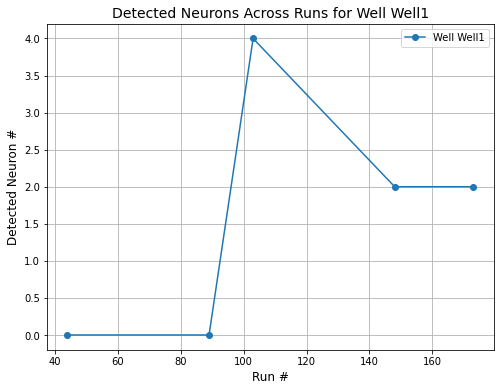

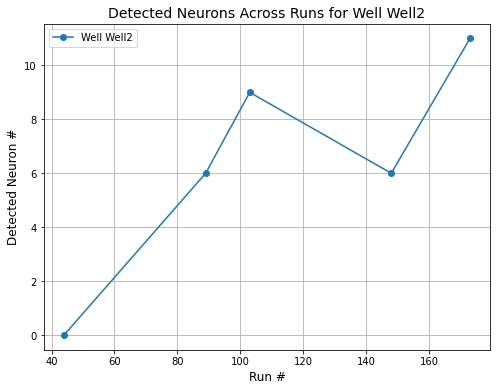

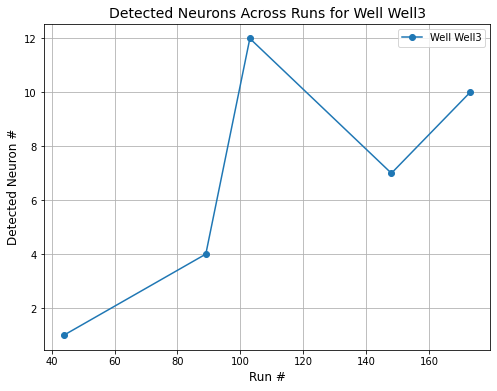

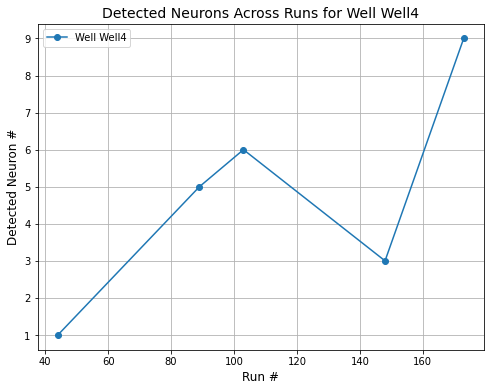

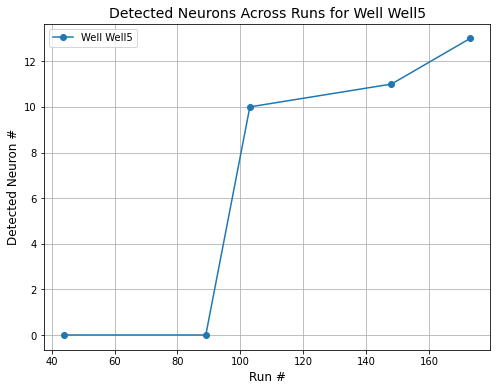

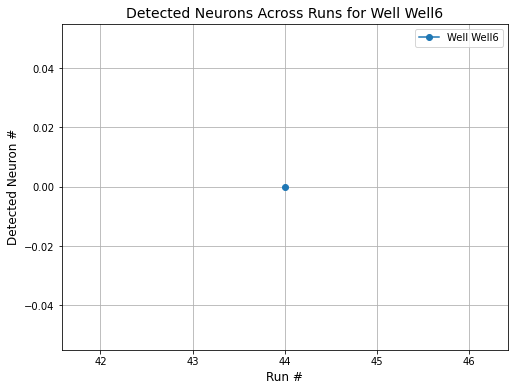

In [35]:
# Group data by 'Well #' and iterate through each well
wells = df["Well #"].unique()

for well in wells:
    # Filter data for the current well
    df_well = df[df["Well #"] == well]
    
    # Plot detected neuron count across runs
    plt.figure(figsize=(8, 6))
    plt.plot(df_well["Run #"], df_well["Neurons Detected"], marker='o', label=f"Well {well}")
    plt.title(f"Detected Neurons Across Runs for Well {well}", fontsize=14)
    plt.xlabel("Run #", fontsize=12)
    plt.ylabel("Detected Neuron #", fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()

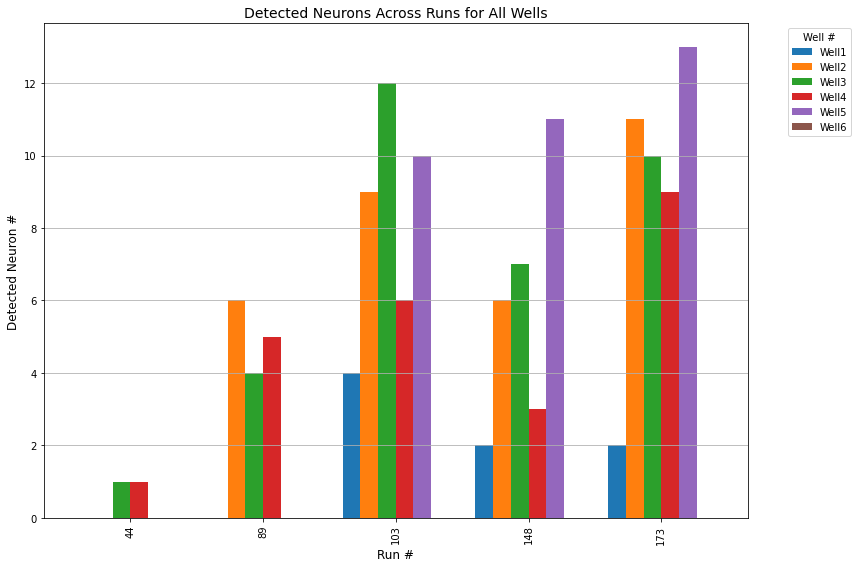

In [36]:
import numpy as np

# Pivot the data to prepare for grouped bar plot
df_pivot = df.pivot(index="Run #", columns="Well #", values="Neurons Detected")

# Plot grouped bar chart
df_pivot.plot(kind="bar", figsize=(12, 8), width=0.8)
plt.title("Detected Neurons Across Runs for All Wells", fontsize=14)
plt.xlabel("Run #", fontsize=12)
plt.ylabel("Detected Neuron #", fontsize=12)
plt.legend(title="Well #", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [38]:
import os
import shutil
import pandas as pd

# Paths
DETECTED_CSV = "/mnt/disk15tb/shruti/output_AxonTracking_T1_08052025/axon_detected_footprints.csv"
ORIGINAL_BASE = "/mnt/ben-shalom_nas/raw_data/rbs_maxtwo_desktop/harddisk24tbvol1/Media_Density_T3_07012025_AR/Media_Density_T3_07012025_AR"
OUTPUT_BASE = "/mnt/disk15tb/shruti/output_AxonTracking_T1_08052025/DetectedPNGs"

# Load CSV
df = pd.read_csv(DETECTED_CSV)
df["Run #"] = df["Run #"].astype(str).str.zfill(6)

# Build dictionary for fast lookup
detected_set = set(
    (row["Run #"], row["Well #"], f"FootprintNeuron#{row['FootprintNeuron #']}.png")
    for _, row in df.iterrows()
)

missing = []
found = 0

# Walk all files in the directory
for root, _, files in os.walk(ORIGINAL_BASE):
    for file in files:
        if file.startswith("FootprintNeuron#") and file.endswith(".png"):
            full_path = os.path.join(root, file)

            # Extract Run and Well from path
            parts = root.split(os.sep)
            try:
                run_idx = next(i for i, p in enumerate(parts) if p.isdigit() and len(p) == 6)
                run_id = parts[run_idx]
                well = next((p for p in parts if p.startswith("Well")), None)
            except StopIteration:
                continue  # skip malformed paths

            # Is this file in our detection CSV?
            key = (run_id, well, file)
            if key in detected_set:
                dst_dir = os.path.join(OUTPUT_BASE, f"Run{run_id}", well)
                os.makedirs(dst_dir, exist_ok=True)
                dst_path = os.path.join(dst_dir, file)
                shutil.copy2(full_path, dst_path)
                found += 1
                print(f"✅ Copied: {file} to {dst_dir}")
                detected_set.remove(key)

# Any that weren't found
for run_id, well, file in detected_set:
    missing.append((run_id, well, file))
    print(f"⚠️ Still missing: Run {run_id}, {well}, {file}")

# Save missing list
pd.DataFrame(missing, columns=["Run #", "Well #", "Filename"]).to_csv(
    "/mnt/disk15tb/shruti/output_AxonTracking_T1_08052025/missing_detected_pngs_updated.csv", index=False
)

print(f"\n✅ Total PNGs copied: {found}")
print(f"📄 Missing list saved as: missing_detected_pngs_updated.csv")


⚠️ Still missing: Run 000148, Well2, FootprintNeuron#13.png
⚠️ Still missing: Run 000173, Well5, FootprintNeuron#11.png
⚠️ Still missing: Run 000103, Well4, FootprintNeuron#22.png
⚠️ Still missing: Run 000148, Well4, FootprintNeuron#9.png
⚠️ Still missing: Run 000148, Well5, FootprintNeuron#9.png
⚠️ Still missing: Run 000148, Well3, FootprintNeuron#6.png
⚠️ Still missing: Run 000173, Well2, FootprintNeuron#3.png
⚠️ Still missing: Run 000173, Well4, FootprintNeuron#27.png
⚠️ Still missing: Run 000173, Well5, FootprintNeuron#27.png
⚠️ Still missing: Run 000089, Well4, FootprintNeuron#4.png
⚠️ Still missing: Run 000103, Well5, FootprintNeuron#1.png
⚠️ Still missing: Run 000148, Well1, FootprintNeuron#4.png
⚠️ Still missing: Run 000089, Well2, FootprintNeuron#1.png
⚠️ Still missing: Run 000103, Well3, FootprintNeuron#25.png
⚠️ Still missing: Run 000173, Well3, FootprintNeuron#14.png
⚠️ Still missing: Run 000148, Well2, FootprintNeuron#10.png
⚠️ Still missing: Run 000103, Well3, FootprintNe

In [48]:
import os
import shutil
import pandas as pd

# Paths
DETECTED_CSV = "/mnt/disk15tb/shruti/output_AxonTracking_T1_08052025/axon_detected_footprints.csv"
ORIGINAL_BASE = "/mnt/ben-shalom_nas/raw_data/rbs_maxtwo_desktop/harddisk24tbvol1/Media_Density_T3_07012025_AR/Media_Density_T3_07012025_AR"
OUTPUT_BASE = "/mnt/disk15tb/shruti/output_AxonTracking_T1_08052025/DetectedPNGs"

# Load CSV and filter rows where Detected == "Yes"
df = pd.read_csv(DETECTED_CSV)
df = df[df["Detected"] == "Yes"]  # Filter only rows with Detected == "Yes"
df["Run #"] = df["Run #"].astype(str).str.zfill(6)  # Ensure Run # is zero-padded to 6 digits

# Build a set for fast lookup
detected_set = set(
    (row["Run #"], row["Well #"].strip(), f"FootprintNeuron#{int(row['FootprintNeuron #'])}.png")
    for _, row in df.iterrows()
)

missing = []
found = 0

# Walk through all files in the directory
for root, _, files in os.walk(ORIGINAL_BASE):
    for file in files:
        if file.startswith("FootprintNeuron#") and file.endswith(".png"):
            full_path = os.path.join(root, file)

            # Extract Run and Well from the path
            parts = root.split(os.sep)
            try:
                # Extract Run ID (6-digit folder)
                run_idx = next(i for i, p in enumerate(parts) if p.isdigit() and len(p) == 6)
                run_id = parts[run_idx].zfill(6)  # Ensure zero-padding

                # Extract Well (folder starting with "Well")
                well = next((p for p in parts if p.startswith("Well")), None)
                if well is None:
                    continue  # Skip if Well is not found

                # Normalize Well and File
                well = well.strip()
                file = file.strip()

                # Check if this file is in our detection set
                key = (run_id, well, file)
                if key in detected_set:
                    dst_dir = os.path.join(OUTPUT_BASE, f"Run{run_id}", well)
                    os.makedirs(dst_dir, exist_ok=True)
                    dst_path = os.path.join(dst_dir, file)
                    shutil.copy2(full_path, dst_path)
                    found += 1
                    print(f"✅ Copied: {file} to {dst_dir}")
                    detected_set.remove(key)
            except StopIteration:
                continue  # Skip malformed paths

# Handle any files that weren't found
for run_id, well, file in detected_set:
    missing.append((run_id, well, file))
    print(f"⚠️ Still missing: Run {run_id}, {well}, {file}")

# Save the missing list to a CSV file
missing_csv_path = "/mnt/disk15tb/shruti/output_AxonTracking_T1_08052025/missing_detected_pngs_updated.csv"
pd.DataFrame(missing, columns=["Run #", "Well #", "Filename"]).to_csv(missing_csv_path, index=False)

print(f"\n✅ Total PNGs copied: {found}")
print(f"📄 Missing list saved as: {missing_csv_path}")

⚠️ Still missing: Run 000148, Well2, FootprintNeuron#13.png
⚠️ Still missing: Run 000173, Well5, FootprintNeuron#11.png
⚠️ Still missing: Run 000103, Well4, FootprintNeuron#22.png
⚠️ Still missing: Run 000148, Well4, FootprintNeuron#9.png
⚠️ Still missing: Run 000148, Well5, FootprintNeuron#9.png
⚠️ Still missing: Run 000148, Well3, FootprintNeuron#6.png
⚠️ Still missing: Run 000173, Well2, FootprintNeuron#3.png
⚠️ Still missing: Run 000173, Well4, FootprintNeuron#27.png
⚠️ Still missing: Run 000173, Well5, FootprintNeuron#27.png
⚠️ Still missing: Run 000089, Well4, FootprintNeuron#4.png
⚠️ Still missing: Run 000103, Well5, FootprintNeuron#1.png
⚠️ Still missing: Run 000148, Well1, FootprintNeuron#4.png
⚠️ Still missing: Run 000089, Well2, FootprintNeuron#1.png
⚠️ Still missing: Run 000103, Well3, FootprintNeuron#25.png
⚠️ Still missing: Run 000173, Well3, FootprintNeuron#14.png
⚠️ Still missing: Run 000148, Well2, FootprintNeuron#10.png
⚠️ Still missing: Run 000103, Well3, FootprintNe

In [42]:
print(f"Searching for: Run {run_id}, Well {well}, File {file}")
print(f"Detected Set: {key in detected_set}")

Searching for: Run 000173, Well Well5, File FootprintNeuron#21.png
Detected Set: False
